<a href="https://colab.research.google.com/github/aiaaee/Unfolding-the-Swiss-Roll-Dataset/blob/main/SwissRoll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sklearn.datasets import make_swiss_roll
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap , LocallyLinearEmbedding , MDS

In [8]:
data = make_swiss_roll(n_samples=200 , noise=0.2 , random_state=42)

In [9]:
data[0].shape

(200, 3)

In [10]:
data[1].shape

(200,)

In [11]:
# X → the 3D coordinates of the points on the Swiss roll (shape: n_samples × 3).
# t → a 1D “position parameter” along the roll, mainly used for coloring/visualization (not extra dimensions).

X , t = make_swiss_roll(n_samples=100 , noise=0.1 ,random_state= 42)

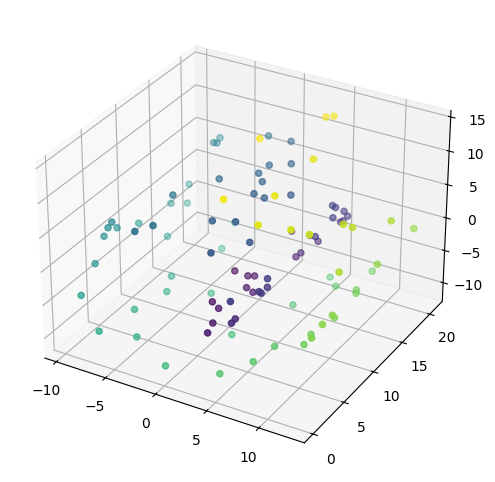

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111 , projection='3d')
ax.scatter(X[: , 0] , X[: , 1] , X[: , 2] , c=t , cmap=plt.cm.viridis)

In [ ]:
import plotly.graph_objects as go
x = X[: , 0]
y = X[: , 1]
z = X[: , 2]
fig = go.Figure(data=go.Scatter3d(x=x,y=y,z=z , mode='markers' , marker=dict(color=t , size=5)))
fig.update_layout(title='Swiss Roll Dataset')
fig.show()

## Gaussian Mixture Model (GMM)

In [ ]:
GMM = GaussianMixture(n_components=5 , random_state=42)
GMM.fit(X)
Glabels= GMM.predict(X)

In [ ]:
fig = go.Figure(data=go.Scatter3d(x=x,y=y,z=z , mode='markers' , marker=dict(color=Glabels , size=5)))
fig.update_layout(title='Swiss Roll Plot with Gaussian Mixture Model Clustering')
fig.show()

## K-means Clustering

In [ ]:
Kmeans = KMeans(n_clusters=5 , random_state=42 , n_init='auto')
Kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
Klabels = Kmeans.predict(X)

In [ ]:
fig = go.Figure(data=go.Scatter3d(x=x,y=y,z=z , mode='markers' , marker=dict(color=Klabels , size=5)))
fig.update_layout(title='Swiss Roll Plot with K-means Clusters ')
fig.show()

In [ ]:
Kmeans.cluster_centers_

array([[ 6.13245769, 16.01153821, -3.09470138],
       [ 3.32670333,  9.88363334,  8.7903166 ],
       [-6.96153964,  6.03268326, -4.74852318],
       [ 6.52433679,  5.07184803, -3.92486835],
       [-6.90327511, 18.48371254, -0.15759439]])

In [ ]:
fig = go.Figure(data=go.Scatter3d(x=x,y=y,z=z , mode='markers' , marker=dict(color=Kmeans.cluster_centers_ , size=5)))
fig.update_layout(title='Swiss Roll Plot with Gaussian Mixture Model Clustering')
fig.show()

## Multi-Dimensional Scaling

In [48]:
mds = MDS(n_components=5 , random_state=42)
mds_X_transformed = mds.fit_transform(X)

In [50]:
mds_x_t = mds_X_transformed[: , 0 ]
mds_y_t = mds_X_transformed[: , 1 ]
mds_z_t = mds_X_transformed[: , 2 ]

In [52]:
fig = go.Figure(data=go.Scatter3d(x=mds_x_t ,y=mds_y_t ,z=mds_z_t  , mode='markers' , marker=dict(color=t , size=5)))
fig.update_layout(title='Swiss Roll Plot with Gaussian Mixture Model Clustering')
fig.show()

## ISOMAP

In [22]:
isomap = Isomap(n_neighbors=12 , eigen_solver='dense')
isomap_X_transformed = isomap.fit_transform(X)

In [23]:
isomap_x_t = isomap_X_transformed[: , 0]
isomap_y_t = isomap_X_transformed[: , 1]
fig = go.Figure(data=go.Scatter(x=isomap_x_t,y=isomap_y_t , mode='markers' , marker=dict(color=t , size=10)))
fig.update_layout(title='Swiss Roll Plot with ISOMAP')
fig.show()

## Locally Linear Embedding

In [34]:
LLE = LocallyLinearEmbedding(n_neighbors=20)

In [35]:
LLE_X_transformed = LLE.fit_transform(X)

In [36]:
LLE_x_t = LLE_X_transformed[: , 0]
LLE_y_t = LLE_X_transformed[: , 1]
fig = go.Figure(data=go.Scatter(x=LLE_x_t,y=LLE_y_t , mode='markers' , marker=dict(color=t , size=10)))
fig.update_layout(title='Swiss Roll Plot with Locally Linear Embedding')
fig.show()

## t-SNE